### Bitly Data from 1.USA.gov
In 2011, the URL shortening service Bitly partnered with the US government website
USA.gov to provide a feed of anonymous data gathered from users who shorten links
ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available
as downloadable text files. 


In the case of the hourly snapshots, each line in each file contains a common form of
web data known as JSON.

In [10]:
path = '/Users/saqib/Downloads/pybook_data/example.txt'

In [12]:
with open(path) as f:
    print(f.readline())


{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



Python has both built-in and third-party libraries for converting a JSON string into a
Python dictionary. Here we’ll use the json module and its loads function invoked on
each line in the sample file we downloaded:

In [15]:
import json

In [17]:
with open(path) as f:
    records = [json.loads(line) for line in f]
    


The resulting object records is now a list of Python dictionaries:

In [20]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in Pure Python
Suppose we were interested in finding the time zones that occur most often in the
dataset (the tz field). There are many ways we could do this. First, let’s extract a list of
time zones again using a list comprehension:

In [23]:
time_zones = [rec["tz"] for rec in records]


KeyError: 'tz'

Oops! Turns out that not all of the records have a time zone field. We can handle this
by adding the check if "tz" in rec at the end of the list comprehension:

In [26]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [28]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Just looking at the first 10 time zones, we see that some of them are unknown (empty
string). You can filter these out also, but I’ll leave them in for now. Next, to produce
counts by time zone, I’ll show two approaches: a harder way (using just the Python
standard library) and a simpler way (using pandas). One way to do the counting is to
use a dictionary to store counts while we iterate through the time zones:

In [31]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts



 Using more advanced tools in the Python standard library, you can write the same
thing more briefly:

In [34]:
from collections import defaultdict


In [36]:
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts



I put this logic in a function just to make it more reusable. To use it on the time
zones, just pass the time_zones list:

In [49]:
counts = get_counts2(time_zones)

In [51]:
counts["America/New_York"]

1251

In [53]:
len(time_zones)

3440

In [63]:
counts

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

If we wanted the top 10 time zones and their counts, we can make a list of tuples by
(count, timezone) and sort it:

In [65]:
def top_counts(count_dict, n= 10):
    value_key_pairs = [(count, tz) for  tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
    


or we could have written it like this:

In [111]:
import heapq
def top_counts(count_dict, n= 10):
    return heapq.nlargest(n, [(count, tz) for tz, count in count_dict.items()])



In [113]:
top_counts(counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

If you search the Python standard library, you may find the collections.Counter
class, which makes this task even simpler:

In [31]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)


In [115]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas
You can create a DataFrame from the original set of records by passing the list of
records to pandas.DataFrame:

In [117]:
import pandas as pd
frame= pd.DataFrame(records)

We can look at some basic information about this new DataFrame, such as column
names, inferred column types, or number of missing values, using frame.info():

In [36]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [37]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

The output shown for the frame is the summary view, shown for large DataFrame
objects. We can then use the value_counts method for the Series:

In [38]:
tz_counts = frame["tz"].value_counts()

In [122]:
tz_counts = frame["tz"].value_counts()

In [124]:
tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

We can visualize this data using matplotlib. We can make the plots a bit nicer by
filling in a substitute value for unknown or missing time zone data in the records. We
replace the missing values with the fillna method and use Boolean array indexing
for the empty strings:

In [126]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz ==""] = "Unknown"
tz_counts = clean_tz.value_counts()

In [128]:
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

At this point, we can use the seaborn package to make a horizontal bar plot (see
Figure 13-1 for the resulting visualization):

<Axes: ylabel='None'>

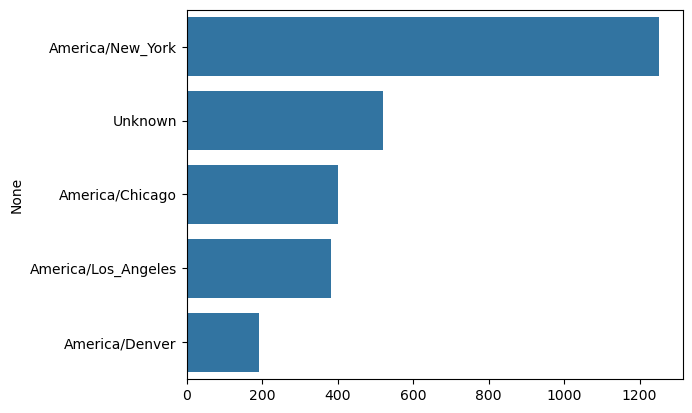

In [154]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x= subset.to_numpy())



<Axes: ylabel='None'>

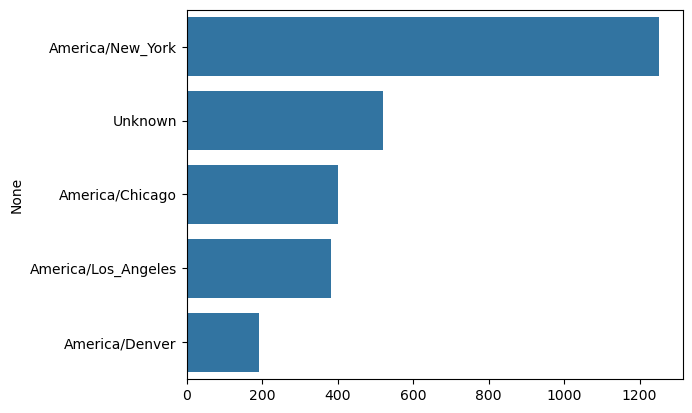

In [160]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(x=subset.to_numpy(), y= subset.index)

The **a** field contains information about the browser, device, or application used to
perform the URL shortening:

In [162]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [170]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [172]:
frame["a"][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [174]:
frame["a"][51][:50] # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

Parsing all of the interesting information in these “agent” strings may seem like
a daunting task. One possible strategy is to split off the first token in the string
(corresponding roughly to the browser capability) and make another summary of the
user behavior:

In [183]:
#results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])


In [181]:
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

Now, suppose you wanted to decompose the top time zones into Windows and
non-Windows users. As a simplification, let’s say that a user is on Windows if the
string "Windows" is in the agent string. Since some of the agents are missing, we’ll
exclude these from the data:

In [185]:
cframe = frame[frame["a"].notna()].copy()

We want to then compute a value for whether or not each row is Windows:

In [214]:
import numpy as np

In [244]:
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Not Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Not Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Not Windows


In [238]:
#cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [325]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [327]:
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

Then, you can group the data by its time zone column and this new list of operating
systems:

In [330]:
by_tz_os = cframe.groupby(["tz", "os"])

The group counts, analogous to the value_counts function, can be computed with
size. This result is then reshaped into a table with unstack:

In [334]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [336]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


Finally, let’s select the top overall time zones. To do so, I construct an indirect index
array from the row counts in agg_counts. After computing the row counts with
agg_counts.sum("columns"), I can call argsort() to obtain an index array that can
be used to sort in ascending order:

In [303]:
indexer = agg_counts.sum("columns").argsort()

In [310]:
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

I use **take** to select the rows in that order, then slice off the last 10 rows (largest
values):

In [289]:
count_subset = agg_counts.take(indexer[-10:])

In [293]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [315]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


pandas has a convenience method called nlargest that does the same thing:

In [347]:
#agg_counts.sum(axis="columns").nlargest(10)
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [349]:
count_subset = agg_counts.take(indexer[-10:])

In [351]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Then, this can be plotted in a grouped bar plot comparing the number of Windows
and non-Windows users, using seaborn’s barplot function (see Figure 13-2). I first
call count_subset.stack() and reset the index to rearrange the data for better
compatibility with seaborn:

In [354]:
count_subset = count_subset.stack()

In [356]:
count_subset.name = "total"

In [359]:
count_subset = count_subset.reset_index()

In [361]:
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

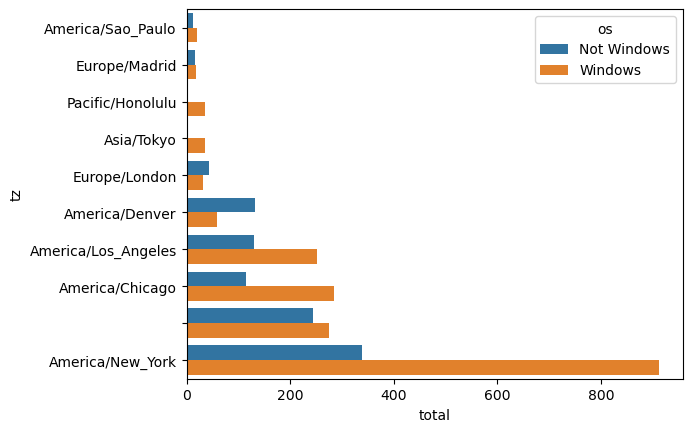

In [363]:
sns.barplot(x="total", y = "tz", hue="os", data=count_subset)

It is a bit difficult to see the relative percentage of Windows users in the smaller
groups, so let’s normalize the group percentages to sum to 1:

In [366]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group
results = count_subset.groupby("tz").apply(norm_total)

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_94341/2692722749.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results = count_subset.groupby("tz").apply(norm_total)


In [368]:
results.head()

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000


In [86]:
results = count_subset.groupby("tz").apply(norm_total)

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_39887/1839985488.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

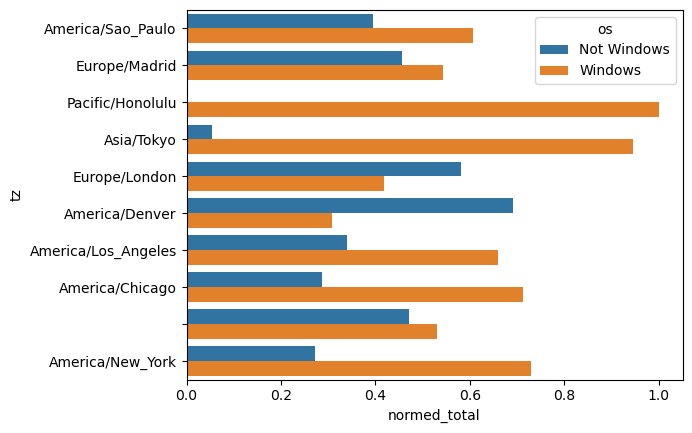

In [87]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

We could have computed the normalized sum more efficiently by using the transform method with groupby:

In [88]:
g = count_subset.groupby("tz")

In [90]:
results2 = count_subset["total"] / g["total"].transform("sum")

In [91]:
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64